In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pycaret.classification import *

In [2]:
# Load the entire dataset into a pandas dataframe

df = pd.read_parquet('/nobackup/amimalik/bits/dataset/dimensions/4Q/working_dataset.parquet')
model_df = pd.read_csv('/nobackup/amimalik/bits/dataset/dimensions/4Q/sorted_failures.csv')

model_df = model_df.head(5)

In [3]:
# make a group with serial no of drive and return the last count no of days

def group_by_serial_number(df, count):

    # Group the instances dataframe by serial number
    grouped_instances = df.groupby('serial_number')

    # Create an empty list to store the last 150 samples for each serial number
    last_n = []

    # Iterate over each group
    for name, group in grouped_instances:
        # Get the last n (count) samples for the current serial number
        last_n_group = group.tail(count)
        # Append the last n samples to the list
        last_n.append(last_n_group)

    # Concatenate the list of dataframes into a single dataframe
    instance_last_n = pd.concat(last_n)

    # Reset the index of the dataframe
    instance_last_n.reset_index(drop=True, inplace=True)

    # Drop the date column from the dataframe
    # instance_last_n.drop(columns=['date'], inplace=True)

    # reset index
    instance_last_n.reset_index(drop=True, inplace=True)

    # Print the updated dataframe
    # instance_last_n.head()

    return instance_last_n

In [4]:
df = group_by_serial_number(df, 15)
df.shape

(63537, 13)

In [5]:
def get_model_data(df, model):
    model_df = df[df['model'] == model]
    model_df = model_df.drop(columns=['model'])
    model_df.drop(columns=['serial_number'], inplace=True)
    return model_df

In [6]:
def get_clean_model_data(df):
    test = df.isnull().sum()
    d_col = []
    for k in test.keys():
        if test[k] == df.shape[0]:
            d_col.append(k)
    df.drop(columns=d_col, inplace=True)
    return df

In [7]:
def get_clear_data(df):
    df.drop(columns=['model', 'serial_number'], inplace=True)
    df_filled = df.fillna(df.mean())
    return df_filled

In [8]:
# List of common tree-based models in PyCaret for classification
ml_models = ['lr', 'dt', 'rf', 'lightgbm', 'xgboost', 'nb', 'knn']
# ml_models = ['dt', 'rf']

# start a loop
m_models = []
m_results = []

mc_models = []
mc_results = []

## Generate entire dataset specific trends

In [9]:
ddf = df.copy()
model_data = get_clear_data(ddf)

s = setup(model_data, target = 'failure', session_id = 123, index=False, fix_imbalance = True, remove_outliers = True, normalize = True, normalize_method = 'minmax', verbose = False, fold=10)

# remove mcc and kappa metrics
remove_metric('mcc')
remove_metric('kappa')

for m in ml_models:
    print (m)
    model = create_model(m)
    model_results = pull().loc[['Mean']]
    mc_models.append(model)
    mc_results.append(model_results)

lr


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.6147,0.5663,0.4675,0.0850,0.1439
1,0.6603,0.5876,0.4513,0.0939,0.1554
2,0.6623,0.5482,0.3916,0.0843,0.1388
3,0.6527,0.5689,0.4337,0.0891,0.1478
4,0.6533,0.5539,0.4142,0.0860,0.1424
5,0.6499,0.5392,0.3929,0.0812,0.1345
6,0.6787,0.5683,0.4026,0.0906,0.1479
7,0.7144,0.5506,0.3312,0.0875,0.1384
8,0.6598,0.5433,0.3961,0.0842,0.1389


dt


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8701,0.5412,0.1623,0.1351,0.1475
1,0.8597,0.5339,0.1558,0.1165,0.1333
2,0.8692,0.5167,0.1100,0.0997,0.1046
3,0.8642,0.5292,0.1424,0.1149,0.1272
4,0.8683,0.5209,0.1165,0.1032,0.1094
5,0.8689,0.5278,0.1331,0.1148,0.1233
6,0.8583,0.5251,0.1396,0.1054,0.1201
7,0.8685,0.5293,0.1364,0.1163,0.1256
8,0.8664,0.5148,0.1104,0.0960,0.1027


rf


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8851,0.6371,0.0649,0.0823,0.0726
1,0.8806,0.6293,0.0649,0.0760,0.0701
2,0.8865,0.6284,0.0939,0.1142,0.1030
3,0.8748,0.6231,0.0874,0.0894,0.0884
4,0.8885,0.6060,0.0712,0.0952,0.0815
5,0.8923,0.6328,0.0682,0.0986,0.0806
6,0.8765,0.6189,0.1104,0.1100,0.1102
7,0.8869,0.6112,0.0682,0.0886,0.0771
8,0.8889,0.6036,0.0844,0.1092,0.0952


lightgbm


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8411,0.5488,0.1656,0.1018,0.1261
1,0.8390,0.5406,0.1591,0.0968,0.1204
2,0.8291,0.5559,0.2006,0.1078,0.1403
3,0.8352,0.5248,0.1359,0.0827,0.1028
4,0.8325,0.5392,0.1392,0.0824,0.1035
5,0.8354,0.5187,0.1526,0.0907,0.1138
6,0.8237,0.5597,0.1851,0.0966,0.1269
7,0.8343,0.5519,0.1786,0.1020,0.1299
8,0.8424,0.5523,0.1981,0.1184,0.1482


xgboost


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8595,0.5052,0.1201,0.0946,0.1059
1,0.8525,0.5062,0.1234,0.0896,0.1038
2,0.8579,0.5181,0.1327,0.1012,0.1148
3,0.8471,0.4958,0.1165,0.0813,0.0957
4,0.8473,0.4945,0.1068,0.0757,0.0886
5,0.8644,0.4906,0.1104,0.0937,0.1013
6,0.8568,0.5264,0.1396,0.1036,0.1189
7,0.8547,0.5199,0.1266,0.0938,0.1077
8,0.8637,0.5231,0.1266,0.1037,0.1140


nb


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.1405,0.5202,0.8669,0.0659,0.1226
1,0.1398,0.5407,0.8604,0.0655,0.1217
2,0.8518,0.5086,0.1165,0.0853,0.0985
3,0.4618,0.5845,0.6893,0.0848,0.1511
4,0.2131,0.5180,0.8058,0.0675,0.1246
5,0.8428,0.5477,0.1721,0.1066,0.1317
6,0.8502,0.4960,0.1266,0.0894,0.1048
7,0.8367,0.5098,0.1136,0.0717,0.0879
8,0.8367,0.5380,0.1558,0.0934,0.1168


knn


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.7925,0.4998,0.1818,0.0770,0.1082
1,0.7918,0.5174,0.1786,0.0755,0.1062
2,0.8010,0.4881,0.1618,0.0740,0.1015
3,0.7936,0.4965,0.1683,0.0729,0.1018
4,0.7956,0.4985,0.1230,0.0562,0.0772
5,0.8030,0.4768,0.1169,0.0562,0.0759
6,0.7846,0.4911,0.1786,0.0724,0.1030
7,0.7981,0.4797,0.1494,0.0674,0.0929
8,0.7994,0.4773,0.1396,0.0642,0.0879


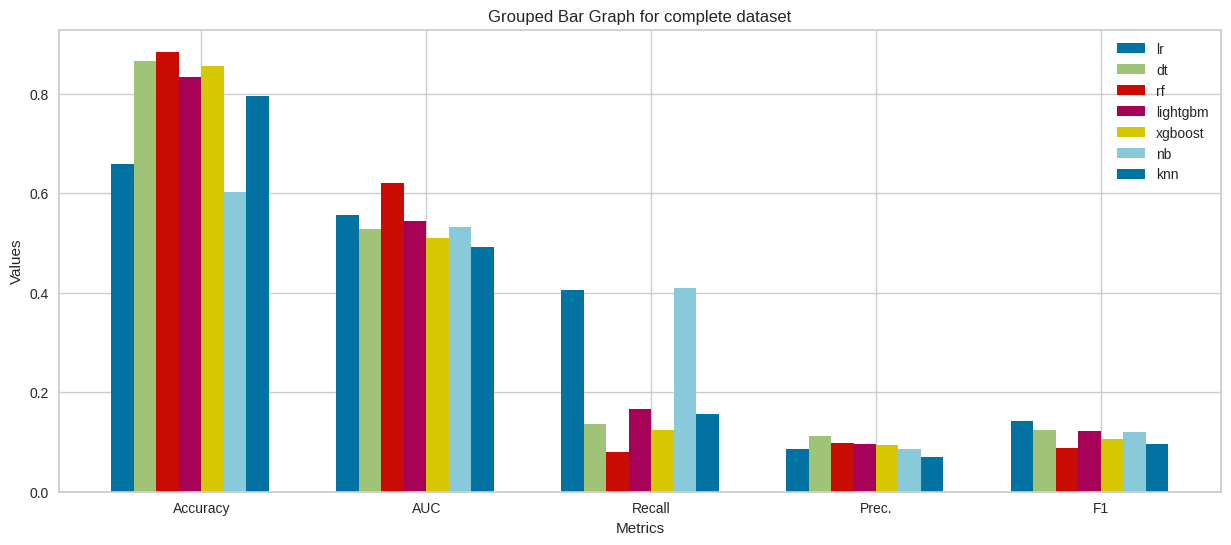

In [10]:
count = 0
metric_names = mc_results[0].columns.tolist()

metric = []
for m in ml_models:
    metric_values = mc_results[count].values[0]
    metric.append(metric_values)
    count += 1

# Set the x-axis positions and bar width
x_pos = np.arange(len(metric_names))
bar_width = 0.1

# Plot the grouped bar graph
fig, ax = plt.subplots(figsize=(15, 6))
for i, model_name in enumerate(ml_models):
    #ax.bar(x_pos + i * bar_width, metric_values[i], bar_width, label=model_name)
    ax.bar(x_pos + i * bar_width, metric[i], bar_width, label=model_name)

# Set the x-axis labels and title
ax.set_xticks(x_pos + (len(ml_models) / 2) * bar_width)
ax.set_xticklabels(metric_names)
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Graph for {}'.format("complete dataset"))

# Add legends
ax.legend()

# Show the plot
plt.show()


In [11]:
mc_results

[      Accuracy     AUC  Recall   Prec.      F1
 Fold                                          
 Mean    0.6583  0.5561  0.4061  0.0858  0.1415,
       Accuracy     AUC  Recall   Prec.      F1
 Fold                                          
 Mean    0.8657  0.5278  0.1366  0.1126  0.1233,
       Accuracy     AUC  Recall   Prec.      F1
 Fold                                          
 Mean    0.8845  0.6214  0.0804  0.0971  0.0877,
       Accuracy     AUC  Recall   Prec.      F1
 Fold                                          
 Mean    0.8344  0.5441  0.1671  0.0968  0.1225,
       Accuracy     AUC  Recall  Prec.      F1
 Fold                                         
 Mean     0.855  0.5095  0.1242  0.093  0.1063,
       Accuracy     AUC  Recall   Prec.      F1
 Fold                                          
 Mean    0.6022  0.5314  0.4095  0.0851  0.1207,
       Accuracy     AUC  Recall   Prec.     F1
 Fold                                         
 Mean    0.7961  0.4913  0.1567  0.0692

## Generate Model specific trends

In [13]:
for dev_models in model_df['model']:
    model_data = get_model_data(df, dev_models)
    model_data = get_clean_model_data(model_data)

    s = setup(model_data, target = 'failure', session_id = 123, index=False, fix_imbalance = True, remove_outliers = True, normalize = True, normalize_method = 'minmax', verbose = False, fold=10)

    # remove mcc and kappa metrics
    remove_metric('mcc')
    remove_metric('kappa')

    for m in ml_models:
        print (m)
        model = create_model(m)
        model_results = pull().loc[['Mean']]
        m_models.append(model)
        m_results.append(model_results)
    print(dev_models)

lr


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.7192,0.5705,0.3810,0.0982,0.1561
1,0.7094,0.6512,0.5238,0.1215,0.1973
2,0.7516,0.6215,0.4286,0.1224,0.1905
3,0.7127,0.5886,0.4048,0.1006,0.1611
4,0.7435,0.6499,0.4524,0.1234,0.1939
5,0.7317,0.6225,0.3659,0.0974,0.1538
6,0.7041,0.5291,0.3659,0.0877,0.1415
7,0.6943,0.5541,0.4286,0.0989,0.1607
8,0.7171,0.5356,0.2857,0.0769,0.1212


dt


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8815,0.5606,0.1905,0.1702,0.1798
1,0.8766,0.5551,0.1905,0.1600,0.1739
2,0.8636,0.5161,0.1190,0.0962,0.1064
3,0.8571,0.5475,0.1905,0.1290,0.1538
4,0.8750,0.4986,0.0714,0.0732,0.0723
5,0.8943,0.5910,0.2439,0.2273,0.2353
6,0.8699,0.5562,0.1707,0.1321,0.1489
7,0.8650,0.5279,0.1429,0.1132,0.1263
8,0.8911,0.5540,0.1667,0.1795,0.1728


rf


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8847,0.6272,0.1667,0.1628,0.1647
1,0.8929,0.7285,0.1190,0.1471,0.1316
2,0.8896,0.6801,0.0952,0.1176,0.1053
3,0.8750,0.6373,0.0952,0.0930,0.0941
4,0.8831,0.6550,0.0714,0.0833,0.0769
5,0.9122,0.6304,0.1463,0.2400,0.1818
6,0.8992,0.7177,0.0976,0.1379,0.1143
7,0.8780,0.6354,0.0714,0.0769,0.0741
8,0.8943,0.6309,0.0952,0.1290,0.1096


lightgbm


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8864,0.5536,0.1190,0.1316,0.1250
1,0.8766,0.6495,0.2143,0.1731,0.1915
2,0.8912,0.5710,0.0952,0.1212,0.1067
3,0.8864,0.5160,0.0714,0.0882,0.0789
4,0.8490,0.5186,0.1190,0.0820,0.0971
5,0.8846,0.4975,0.1220,0.1250,0.1235
6,0.8829,0.5847,0.1220,0.1220,0.1220
7,0.8748,0.5964,0.1429,0.1277,0.1348
8,0.8764,0.5330,0.1667,0.1458,0.1556


xgboost


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8880,0.5123,0.1429,0.1538,0.1481
1,0.8847,0.6235,0.1905,0.1778,0.1839
2,0.8929,0.5535,0.1667,0.1842,0.1750
3,0.8750,0.4944,0.0476,0.0513,0.0494
4,0.8636,0.4786,0.0714,0.0625,0.0667
5,0.8927,0.5434,0.1463,0.1622,0.1538
6,0.8894,0.5773,0.0732,0.0909,0.0811
7,0.8992,0.6050,0.1429,0.1875,0.1622
8,0.9008,0.5034,0.1429,0.1935,0.1644


nb


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.7987,0.5368,0.2619,0.1058,0.1507
1,0.8328,0.6308,0.3810,0.1720,0.2370
2,0.8360,0.5949,0.2143,0.1169,0.1513
3,0.7987,0.5522,0.3095,0.1204,0.1733
4,0.8539,0.6223,0.3571,0.1923,0.2500
5,0.7789,0.5891,0.3659,0.1200,0.1807
6,0.8065,0.5406,0.2439,0.1020,0.1439
7,0.8033,0.5271,0.2143,0.0928,0.1295
8,0.8244,0.6151,0.2381,0.1163,0.1562


knn


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8718,0.5517,0.1429,0.1224,0.1319
1,0.8896,0.6082,0.2619,0.2292,0.2444
2,0.8620,0.4673,0.1429,0.1091,0.1237
3,0.8766,0.5217,0.0952,0.0952,0.0952
4,0.8539,0.4629,0.0714,0.0556,0.0625
5,0.8748,0.4619,0.0732,0.0714,0.0723
6,0.8585,0.5375,0.1707,0.1167,0.1386
7,0.8585,0.4828,0.1190,0.0909,0.1031
8,0.8780,0.5041,0.1190,0.1163,0.1176


ST12000NM0008
lr


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.6961,0.6365,0.5000,0.1149,0.1868
1,0.7310,0.6606,0.4118,0.1120,0.1761
2,0.7228,0.5344,0.4118,0.1085,0.1718
3,0.7125,0.6726,0.5588,0.1319,0.2135
4,0.7125,0.5673,0.4571,0.1168,0.1860
5,0.7290,0.6609,0.4286,0.1181,0.1852
6,0.7310,0.5646,0.3429,0.1000,0.1548
7,0.7305,0.6082,0.4412,0.1181,0.1863
8,0.7160,0.5996,0.2647,0.0738,0.1154


dt


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8439,0.5051,0.1176,0.0800,0.0952
1,0.8542,0.5775,0.2647,0.1636,0.2022
2,0.8747,0.5363,0.1471,0.1351,0.1408
3,0.8747,0.5307,0.1471,0.1351,0.1408
4,0.8706,0.5340,0.1429,0.1316,0.1370
5,0.8583,0.5511,0.2000,0.1458,0.1687
6,0.8789,0.5346,0.1429,0.1471,0.1449
7,0.8724,0.5607,0.2059,0.1667,0.1842
8,0.8786,0.5356,0.1471,0.1429,0.1449


rf


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8850,0.6417,0.0588,0.0769,0.0667
1,0.8789,0.6457,0.1471,0.1429,0.1449
2,0.8830,0.6732,0.0294,0.0400,0.0339
3,0.8973,0.7508,0.1176,0.1667,0.1379
4,0.8871,0.6284,0.1714,0.1875,0.1791
5,0.8912,0.6915,0.1429,0.1786,0.1587
6,0.8891,0.6343,0.0857,0.1200,0.1000
7,0.8909,0.6366,0.1176,0.1481,0.1311
8,0.9095,0.6350,0.0294,0.0833,0.0435


lightgbm


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8953,0.4771,0.0588,0.0952,0.0727
1,0.8850,0.5783,0.2059,0.1944,0.2000
2,0.8932,0.4840,0.0294,0.0500,0.0370
3,0.8932,0.5566,0.0882,0.1250,0.1034
4,0.8871,0.4769,0.1429,0.1667,0.1538
5,0.9076,0.5457,0.2571,0.3214,0.2857
6,0.8871,0.5479,0.0571,0.0833,0.0678
7,0.8827,0.5327,0.1176,0.1290,0.1231
8,0.8992,0.5564,0.0882,0.1429,0.1091


xgboost


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.9035,0.5333,0.0588,0.1176,0.0784
1,0.8809,0.5563,0.1471,0.1471,0.1471
2,0.9014,0.5093,0.0882,0.1500,0.1111
3,0.8994,0.5633,0.1471,0.2000,0.1695
4,0.8809,0.4997,0.1143,0.1290,0.1212
5,0.8973,0.5286,0.2000,0.2414,0.2188
6,0.8973,0.4533,0.0857,0.1429,0.1071
7,0.8889,0.5530,0.0588,0.0833,0.0690
8,0.9136,0.5213,0.1765,0.3000,0.2222


nb


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.1355,0.6203,0.9118,0.0690,0.1284
1,0.1355,0.4799,0.9706,0.0728,0.1355
2,0.1602,0.4443,0.8824,0.0690,0.1279
3,0.1273,0.6291,0.9118,0.0684,0.1273
4,0.1088,0.4845,0.8286,0.0635,0.1179
5,0.1478,0.5169,0.8857,0.0701,0.1300
6,0.1437,0.4438,0.9143,0.0717,0.1331
7,0.1440,0.5988,1.0000,0.0756,0.1405
8,0.1461,0.5586,0.9412,0.0719,0.1336


knn


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8522,0.5613,0.1176,0.0870,0.1000
1,0.8378,0.5607,0.1765,0.1053,0.1319
2,0.8727,0.4636,0.1471,0.1316,0.1389
3,0.8665,0.5542,0.2647,0.1837,0.2169
4,0.8542,0.5314,0.2286,0.1538,0.1839
5,0.8830,0.5984,0.2857,0.2381,0.2597
6,0.8542,0.5078,0.2000,0.1400,0.1647
7,0.8745,0.5658,0.2647,0.2000,0.2278
8,0.8683,0.5368,0.2353,0.1739,0.2000


ST8000NM0055
lr


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.6937,0.6043,0.5000,0.1143,0.1860
1,0.6513,0.5721,0.4839,0.0949,0.1587
2,0.6996,0.6226,0.4839,0.1103,0.1796
3,0.6557,0.6454,0.5806,0.1111,0.1865
4,0.6711,0.6852,0.5625,0.1169,0.1935
5,0.6930,0.6122,0.4062,0.0970,0.1566
6,0.5987,0.5279,0.4375,0.0782,0.1327
7,0.6579,0.5414,0.4062,0.0867,0.1429
8,0.6601,0.5574,0.4375,0.0927,0.1530


dt


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8731,0.5272,0.1250,0.1176,0.1212
1,0.8794,0.5465,0.1613,0.1471,0.1538
2,0.8596,0.5060,0.0968,0.0769,0.0857
3,0.8750,0.4993,0.0645,0.0667,0.0656
4,0.8728,0.5127,0.0938,0.0938,0.0938
5,0.8816,0.5318,0.1250,0.1333,0.1290
6,0.8838,0.5764,0.2188,0.2000,0.2090
7,0.8904,0.5221,0.0938,0.1250,0.1071
8,0.8509,0.5153,0.1250,0.0909,0.1053


rf


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.9015,0.6729,0.1562,0.2174,0.1818
1,0.8947,0.6786,0.0968,0.1304,0.1111
2,0.8882,0.6708,0.0968,0.1154,0.1053
3,0.8947,0.6676,0.0968,0.1304,0.1111
4,0.8816,0.7440,0.1250,0.1333,0.1290
5,0.9101,0.6366,0.0938,0.2000,0.1277
6,0.9013,0.6761,0.2188,0.2593,0.2373
7,0.8882,0.5952,0.0625,0.0870,0.0727
8,0.8816,0.5677,0.1250,0.1333,0.1290


lightgbm


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8972,0.5080,0.1250,0.1739,0.1455
1,0.8947,0.4959,0.0323,0.0526,0.0400
2,0.8728,0.5572,0.1290,0.1143,0.1212
3,0.8969,0.4931,0.0323,0.0556,0.0408
4,0.8947,0.5043,0.1250,0.1667,0.1429
5,0.8947,0.4950,0.0312,0.0556,0.0400
6,0.9057,0.4755,0.1250,0.2105,0.1569
7,0.8925,0.4380,0.0938,0.1304,0.1091
8,0.8991,0.4743,0.1250,0.1818,0.1481


xgboost


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8972,0.5324,0.0938,0.1429,0.1132
1,0.8925,0.4965,0.0968,0.1250,0.1091
2,0.8882,0.5040,0.0645,0.0833,0.0727
3,0.9013,0.4952,0.0968,0.1500,0.1176
4,0.8838,0.5475,0.0625,0.0800,0.0702
5,0.8904,0.5241,0.0312,0.0500,0.0385
6,0.9057,0.5023,0.1875,0.2609,0.2182
7,0.8838,0.4914,0.0625,0.0800,0.0702
8,0.8838,0.4334,0.1250,0.1379,0.1311


nb


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8556,0.5636,0.1562,0.1136,0.1316
1,0.8443,0.4303,0.1613,0.1000,0.1235
2,0.8004,0.4820,0.2581,0.1053,0.1495
3,0.7083,0.5184,0.3226,0.0820,0.1307
4,0.7259,0.6922,0.5000,0.1280,0.2038
5,0.8662,0.5846,0.1875,0.1463,0.1644
6,0.7544,0.5318,0.4375,0.1296,0.2000
7,0.7917,0.4924,0.1875,0.0800,0.1121
8,0.8070,0.5373,0.1875,0.0882,0.1200


knn


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8643,0.4978,0.0625,0.0588,0.0606
1,0.8750,0.5449,0.2258,0.1750,0.1972
2,0.8509,0.5201,0.1290,0.0889,0.1053
3,0.8596,0.4750,0.1613,0.1163,0.1351
4,0.8421,0.5547,0.2500,0.1429,0.1818
5,0.8618,0.4875,0.0625,0.0571,0.0597
6,0.8662,0.5098,0.1562,0.1282,0.1408
7,0.8662,0.5031,0.0938,0.0857,0.0896
8,0.8487,0.4825,0.1562,0.1064,0.1266


ST4000DM000
lr


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.6502,0.4845,0.3333,0.0719,0.1183
1,0.6573,0.5338,0.4000,0.0857,0.1412
2,0.6385,0.6026,0.3667,0.0753,0.1250
3,0.6612,0.5226,0.3103,0.0677,0.1111
4,0.6682,0.5124,0.3448,0.0758,0.1242
5,0.6541,0.6009,0.4828,0.0959,0.1600
6,0.6400,0.5456,0.4138,0.0811,0.1356
7,0.6518,0.5644,0.5172,0.1007,0.1685
8,0.6800,0.4784,0.3448,0.0787,0.1282


dt


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8709,0.4838,0.0333,0.0370,0.0351
1,0.8732,0.5621,0.2000,0.1667,0.1818
2,0.8427,0.4841,0.0667,0.0488,0.0563
3,0.8682,0.5458,0.1724,0.1351,0.1515
4,0.8824,0.5054,0.0690,0.0800,0.0741
5,0.8753,0.5815,0.2414,0.1842,0.2090
6,0.8541,0.4903,0.0690,0.0541,0.0606
7,0.8541,0.4903,0.0690,0.0541,0.0606
8,0.8635,0.4794,0.0345,0.0323,0.0333


rf


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8685,0.5930,0.0000,0.0000,0.0000
1,0.8756,0.5751,0.0333,0.0400,0.0364
2,0.8826,0.5778,0.0333,0.0455,0.0385
3,0.8706,0.5476,0.1034,0.0938,0.0984
4,0.8847,0.5904,0.0000,0.0000,0.0000
5,0.8824,0.6103,0.0690,0.0800,0.0741
6,0.8682,0.5504,0.0690,0.0645,0.0667
7,0.8682,0.4898,0.0345,0.0345,0.0345
8,0.8800,0.4270,0.0000,0.0000,0.0000


lightgbm


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8756,0.4438,0.0333,0.0400,0.0364
1,0.8967,0.4301,0.0333,0.0625,0.0435
2,0.8944,0.3647,0.0000,0.0000,0.0000
3,0.8918,0.5017,0.0690,0.0952,0.0800
4,0.9012,0.4615,0.0345,0.0667,0.0455
5,0.8965,0.4242,0.0345,0.0588,0.0435
6,0.9129,0.4407,0.0345,0.1000,0.0513
7,0.8988,0.3881,0.0345,0.0625,0.0444
8,0.8776,0.3593,0.0345,0.0400,0.0370


xgboost


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8756,0.4479,0.0333,0.0400,0.0364
1,0.8850,0.4235,0.0667,0.0870,0.0755
2,0.8991,0.4502,0.0333,0.0667,0.0444
3,0.8918,0.4886,0.0690,0.0952,0.0800
4,0.8918,0.3654,0.0690,0.0952,0.0800
5,0.8847,0.3749,0.0345,0.0455,0.0392
6,0.8988,0.4552,0.0345,0.0625,0.0444
7,0.9012,0.3290,0.0345,0.0667,0.0455
8,0.8847,0.3546,0.0000,0.0000,0.0000


nb


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.6221,0.4560,0.4000,0.0774,0.1297
1,0.2441,0.4332,0.6667,0.0602,0.1105
2,0.2019,0.4727,0.7333,0.0621,0.1146
3,0.4894,0.5248,0.5517,0.0727,0.1285
4,0.2800,0.4700,0.5862,0.0547,0.1000
5,0.2000,0.5421,0.8276,0.0669,0.1237
6,0.6824,0.5101,0.3448,0.0794,0.1290
7,0.2306,0.5209,0.7931,0.0669,0.1233
8,0.7153,0.4869,0.2069,0.0577,0.0902


knn


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8615,0.5257,0.1000,0.0857,0.0923
1,0.8709,0.4678,0.0667,0.0690,0.0678
2,0.8803,0.5003,0.0667,0.0800,0.0727
3,0.8682,0.5055,0.1034,0.0909,0.0968
4,0.8635,0.4171,0.0690,0.0606,0.0645
5,0.8753,0.5586,0.1379,0.1250,0.1311
6,0.8400,0.4675,0.0690,0.0465,0.0556
7,0.8447,0.4831,0.0690,0.0488,0.0571
8,0.8588,0.4097,0.1034,0.0811,0.0909


TOSHIBA MG07ACA14TA
lr


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.4383,0.4925,0.5357,0.0667,0.1186
1,0.4131,0.4448,0.4643,0.0563,0.1004
2,0.4383,0.5869,0.7500,0.0886,0.1585
3,0.3602,0.4455,0.5714,0.0620,0.1119
4,0.4332,0.4678,0.5357,0.0661,0.1176
5,0.4509,0.4476,0.4286,0.0561,0.0992
6,0.4660,0.4665,0.4483,0.0622,0.1092
7,0.3778,0.5307,0.5862,0.0675,0.1210
8,0.4798,0.5314,0.6429,0.0841,0.1488


dt


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8715,0.5018,0.0714,0.0741,0.0727
1,0.8892,0.4948,0.0357,0.0556,0.0435
2,0.8564,0.5102,0.1071,0.0857,0.0952
3,0.8715,0.5018,0.0714,0.0741,0.0727
4,0.8489,0.5061,0.1071,0.0789,0.0909
5,0.8866,0.5265,0.1071,0.1304,0.1176
6,0.8564,0.4937,0.0690,0.0625,0.0656
7,0.8816,0.5073,0.0690,0.0909,0.0784
8,0.8662,0.5309,0.1429,0.1212,0.1311


rf


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8841,0.6150,0.0357,0.0500,0.0417
1,0.8967,0.5599,0.0000,0.0000,0.0000
2,0.8816,0.5466,0.0357,0.0476,0.0408
3,0.8917,0.6159,0.1071,0.1429,0.1224
4,0.8841,0.6392,0.1071,0.1250,0.1154
5,0.8942,0.5938,0.0357,0.0625,0.0455
6,0.8816,0.6751,0.0690,0.0909,0.0784
7,0.8992,0.6073,0.0000,0.0000,0.0000
8,0.8889,0.5474,0.0714,0.1000,0.0833


lightgbm


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.9093,0.4691,0.0000,0.0000,0.0000
1,0.9194,0.4258,0.0000,0.0000,0.0000
2,0.9169,0.4329,0.0357,0.1429,0.0571
3,0.9043,0.4174,0.0000,0.0000,0.0000
4,0.9068,0.4674,0.0357,0.0909,0.0513
5,0.9144,0.4300,0.0714,0.2000,0.1053
6,0.8967,0.4765,0.0000,0.0000,0.0000
7,0.9144,0.4047,0.0000,0.0000,0.0000
8,0.9091,0.4638,0.0357,0.1000,0.0526


xgboost


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.9068,0.4727,0.0000,0.0000,0.0000
1,0.9118,0.4001,0.0000,0.0000,0.0000
2,0.9093,0.4072,0.0357,0.1000,0.0526
3,0.8942,0.4012,0.0000,0.0000,0.0000
4,0.8892,0.3905,0.0714,0.1000,0.0833
5,0.9169,0.5129,0.0714,0.2222,0.1081
6,0.8942,0.5273,0.0000,0.0000,0.0000
7,0.9194,0.3975,0.0000,0.0000,0.0000
8,0.8990,0.4557,0.0714,0.1250,0.0909


nb


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.2670,0.4714,0.9286,0.0825,0.1516
1,0.2418,0.4657,0.7143,0.0639,0.1173
2,0.3149,0.5520,0.7857,0.0764,0.1392
3,0.2494,0.4251,0.7143,0.0645,0.1183
4,0.3275,0.3937,0.6071,0.0623,0.1130
5,0.2544,0.4774,0.7857,0.0705,0.1294
6,0.3426,0.5511,0.7931,0.0827,0.1498
7,0.3174,0.4062,0.5172,0.0551,0.0997
8,0.2576,0.4426,0.7500,0.0682,0.1250


knn


,Accuracy,AUC,Recall,Prec.,F1
Fold,,,,,
0,0.8514,0.5324,0.1429,0.1026,0.1194
1,0.8615,0.4517,0.0000,0.0000,0.0000
2,0.8388,0.4914,0.0714,0.0500,0.0588
3,0.8589,0.4399,0.0714,0.0625,0.0667
4,0.8463,0.4530,0.0357,0.0286,0.0317
5,0.8741,0.5501,0.0714,0.0769,0.0741
6,0.8463,0.4859,0.1034,0.0789,0.0896
7,0.8640,0.4441,0.0345,0.0370,0.0357
8,0.8535,0.5230,0.1429,0.1053,0.1212


HGST HUH721212ALN604


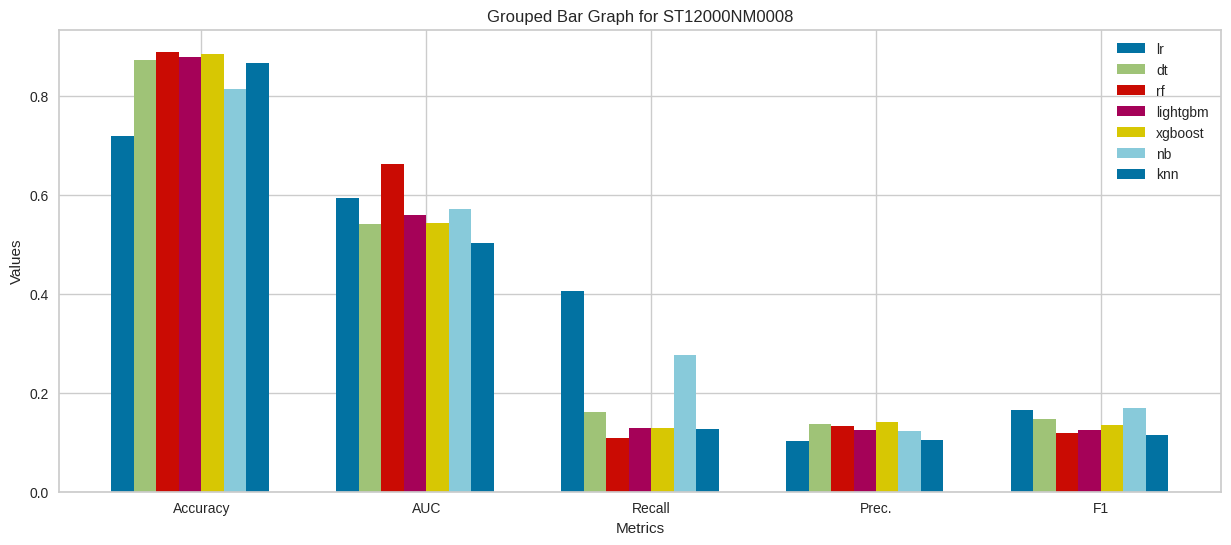

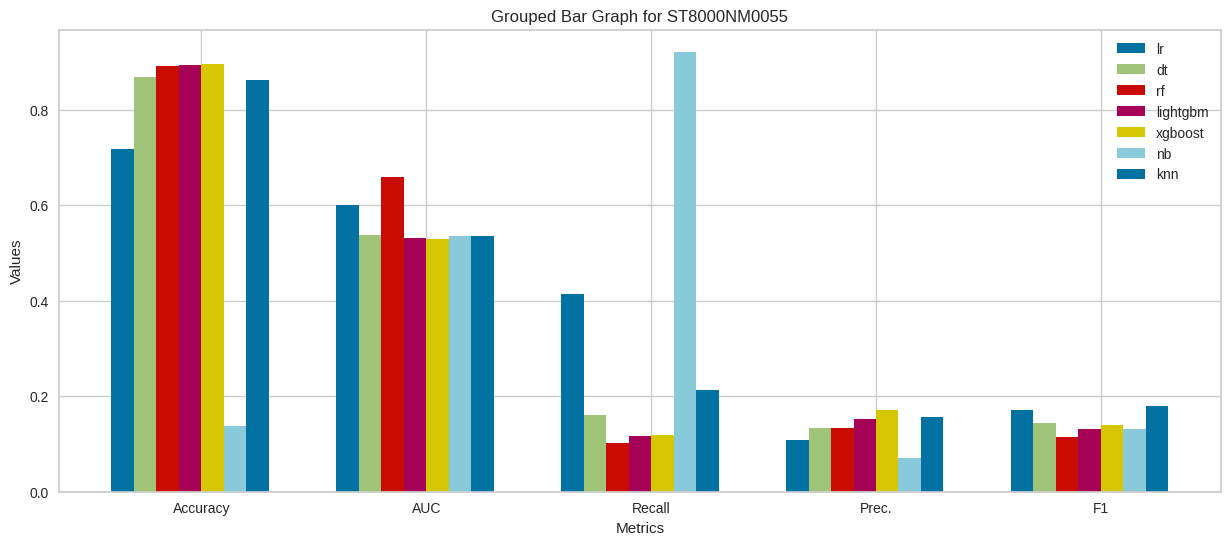

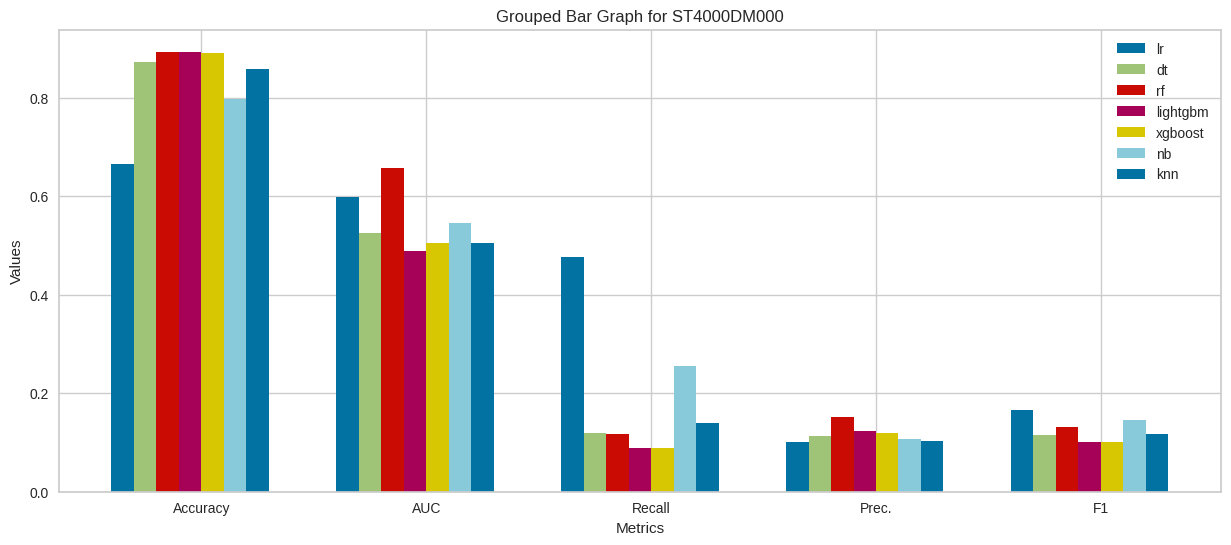

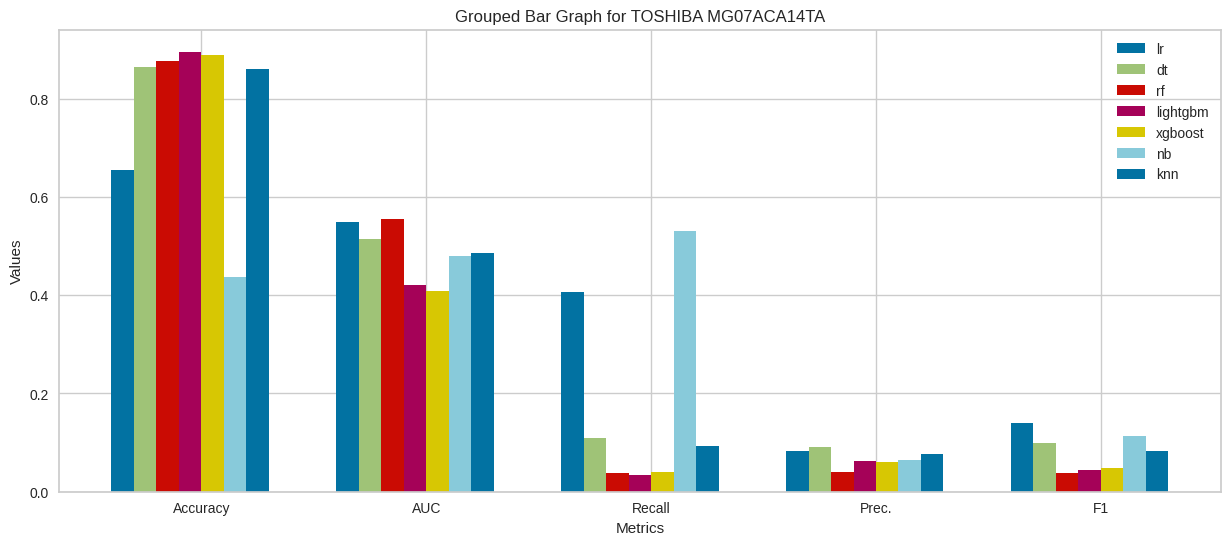

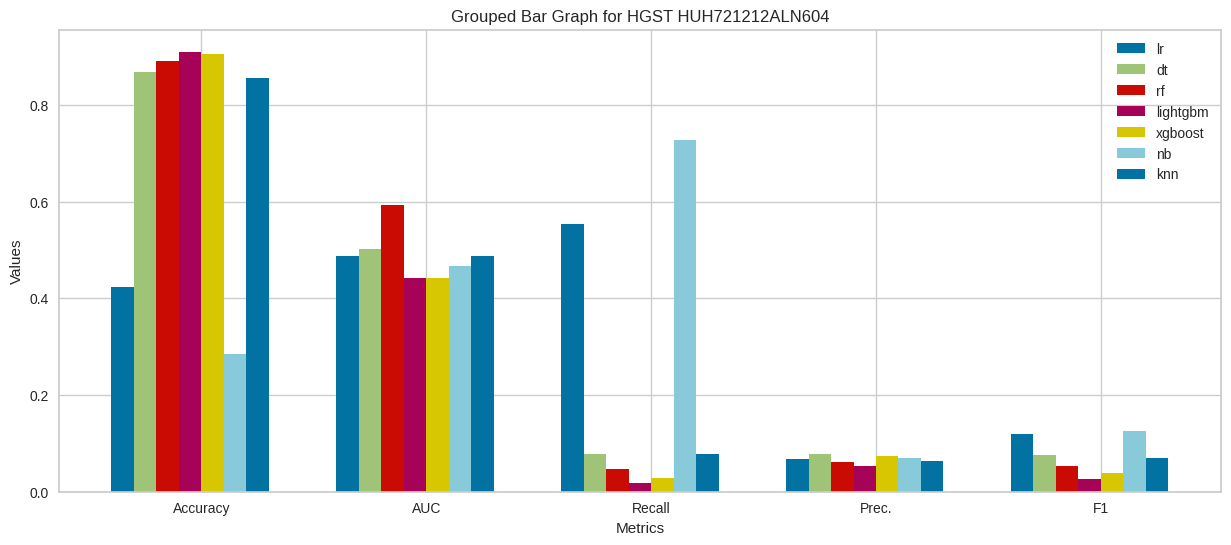

In [14]:
count = 0
metric_names = m_results[0].columns.tolist()


for dev_models in model_df['model']:
    metric = []
    for m in ml_models:
        metric_values = m_results[count].values[0]
        metric.append(metric_values)
        count += 1

    # Set the x-axis positions and bar width
    x_pos = np.arange(len(metric_names))
    bar_width = 0.1

    # Plot the grouped bar graph
    fig, ax = plt.subplots(figsize=(15, 6))
    for i, model_name in enumerate(ml_models):
        #ax.bar(x_pos + i * bar_width, metric_values[i], bar_width, label=model_name)
        ax.bar(x_pos + i * bar_width, metric[i], bar_width, label=model_name)

    # Set the x-axis labels and title
    ax.set_xticks(x_pos + (len(ml_models) / 2) * bar_width)
    ax.set_xticklabels(metric_names)
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.set_title('Grouped Bar Graph for {}'.format(dev_models))

    # Add legends
    ax.legend()

    # Show the plot
    plt.show()


In [15]:
m_results

[      Accuracy     AUC  Recall   Prec.      F1
 Fold                                          
 Mean    0.7192  0.5933  0.4065  0.1031  0.1644,
       Accuracy     AUC  Recall   Prec.      F1
 Fold                                          
 Mean    0.8736  0.5422  0.1605  0.1375  0.1475,
       Accuracy     AUC  Recall   Prec.      F1
 Fold                                          
 Mean    0.8902  0.6622  0.1077  0.1335  0.1184,
       Accuracy     AUC  Recall   Prec.      F1
 Fold                                          
 Mean    0.8791  0.5589  0.1292  0.1242  0.1257,
       Accuracy     AUC  Recall   Prec.      F1
 Fold                                          
 Mean    0.8864  0.5438  0.1291  0.1413  0.1342,
       Accuracy     AUC  Recall   Prec.      F1
 Fold                                          
 Mean    0.8146  0.5729  0.2776  0.1228  0.1695,
       Accuracy     AUC  Recall   Prec.      F1
 Fold                                          
 Mean    0.8666  0.5029  0.1268  0